## LetsGrowMore - Nov2021

### Lakshit RamPrakash Gupta - Data Science Intern

### Task 2.1 - Exploratory Data Analysis on Dataset - Terrorism

Dataset - https://bit.ly/2TK5Xn5

## Importing the Required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Reading the Data

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin1')

In [3]:
# Checking head of the dataset
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


As we can see from above result, the column names are difficult to understand so we will now rename the columns for better understanding

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [5]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


## Exploratory Data Analysis (EDA)

In [7]:
# Checking if the data contains any null or blank values
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [8]:
# Checking dimensions of the dataframe
data.shape

(181691, 18)

In [10]:
# Replacing the null values of Wound and kill column with 0
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [11]:
data['Deaths'] = data['kill'] + data['Wound']

In [12]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill               0
Wound              0
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
Deaths             0
dtype: int64

In [13]:
data.drop(['motive','summary','latitude','longitude'],axis=1,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Attacktype  181691 non-null  object 
 8   kill        181691 non-null  float64
 9   Wound       181691 non-null  float64
 10  target1     181055 non-null  object 
 11  Group       181691 non-null  object 
 12  Targettype  181691 non-null  object 
 13  Weapon      181691 non-null  object 
 14  Deaths      181691 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 20.8+ MB


In [16]:
data.describe()

,Year,Month,day,kill,Wound,Deaths
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


We have almost got a better understanding of the dataset through EDA so now let's visualize it

## Visualizations

In [17]:
attk = data.Country.value_counts()[:5]
attk

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

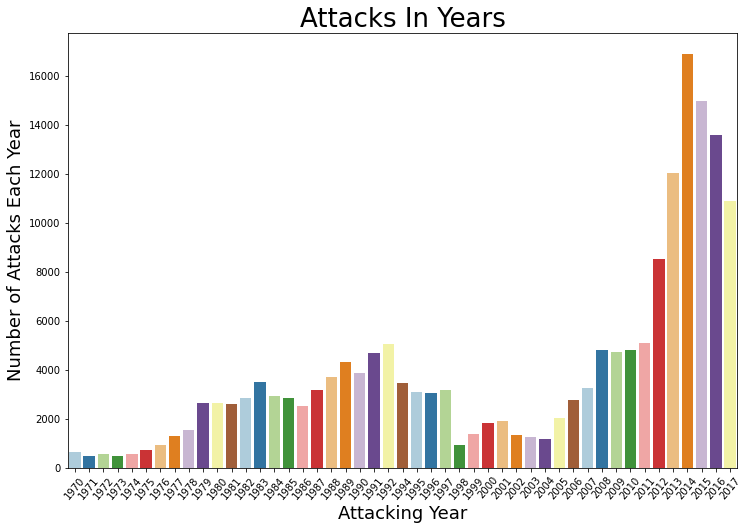

In [18]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,8))
sns.barplot(x = year,
           y = years_count,
           palette = "Paired")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=18)
plt.ylabel('Number of Attacks Each Year',fontsize=18)
plt.title('Attacks In Years',fontsize=26)
plt.show()

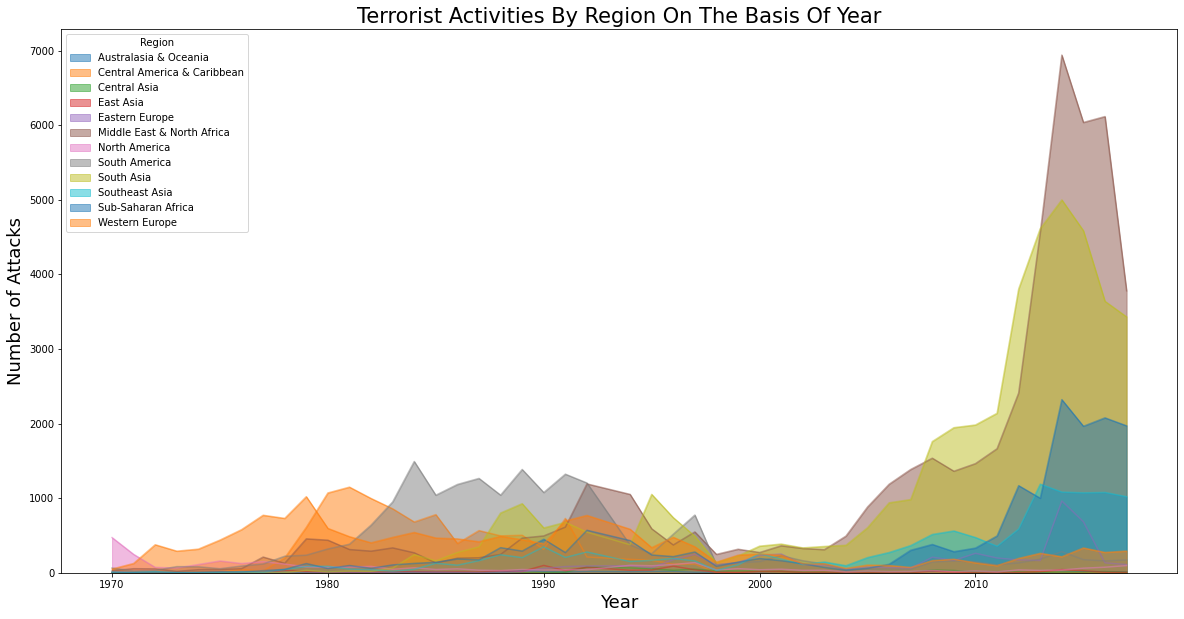

In [19]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region On The Basis Of Year',fontsize=21)
plt.ylabel('Number of Attacks',fontsize=18)
plt.xlabel("Year",fontsize=18)
plt.show()

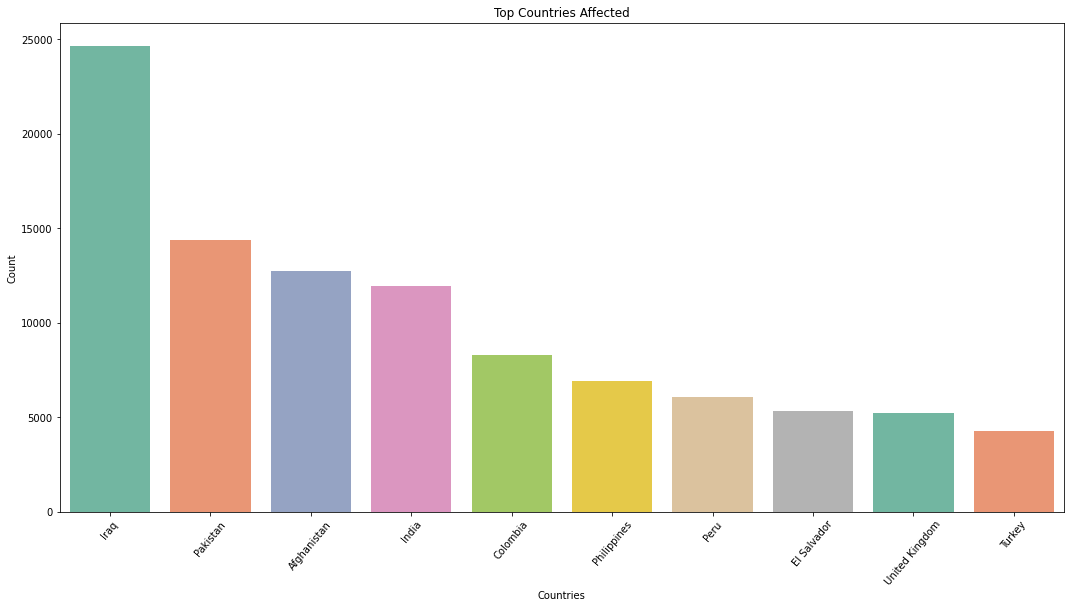

In [20]:
plt.subplots(figsize=(18,9))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette="Set2")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

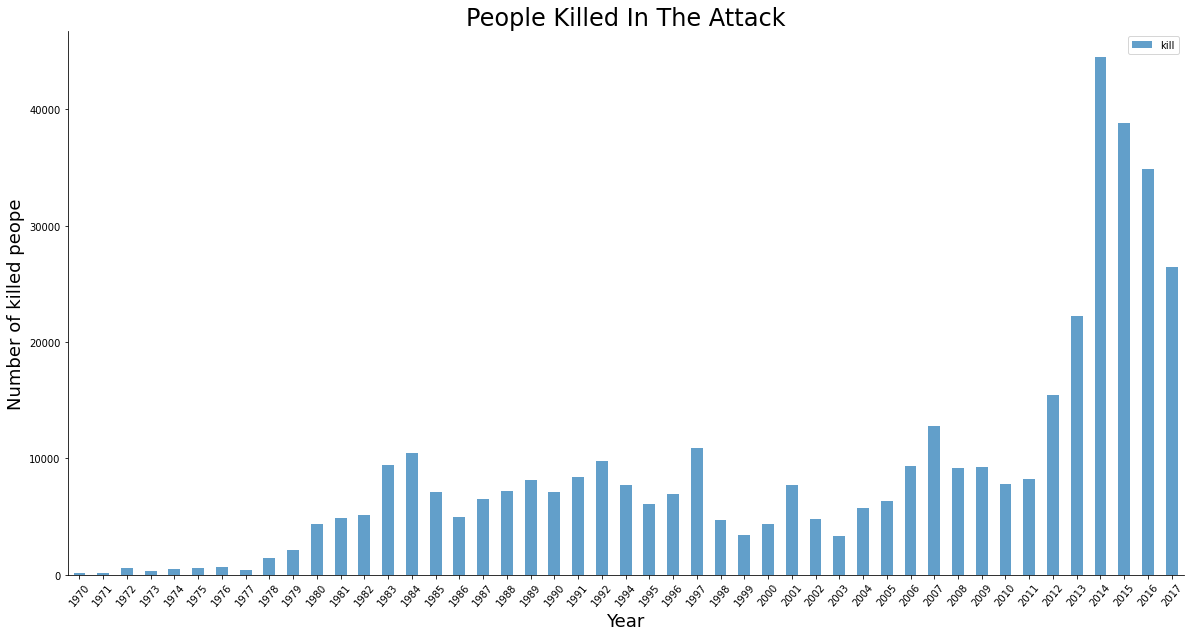

In [21]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Killed In The Attack",fontsize=24)
plt.ylabel("Number of killed peope",fontsize=18)
plt.xlabel('Year',fontsize=18)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

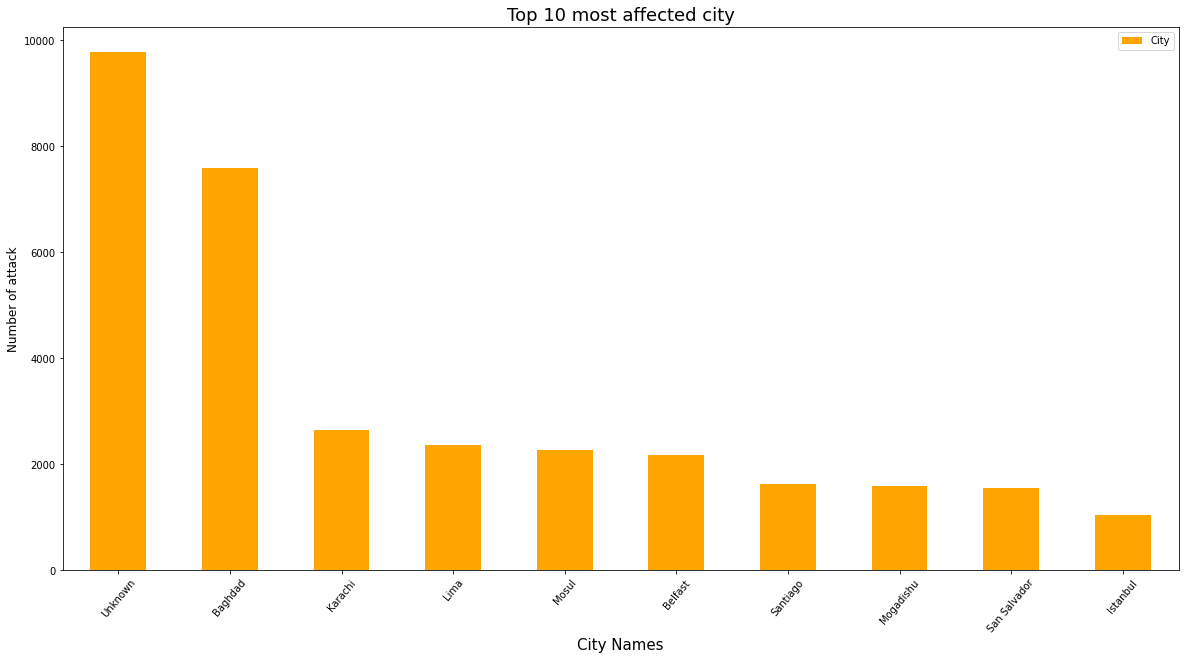

In [24]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color="Orange")
plt.xticks(rotation = 50)
plt.xlabel("City Names",fontsize=15)
plt.ylabel("Number of attack",fontsize=12)
plt.title("Top 10 most affected city",fontsize=18)
plt.show()

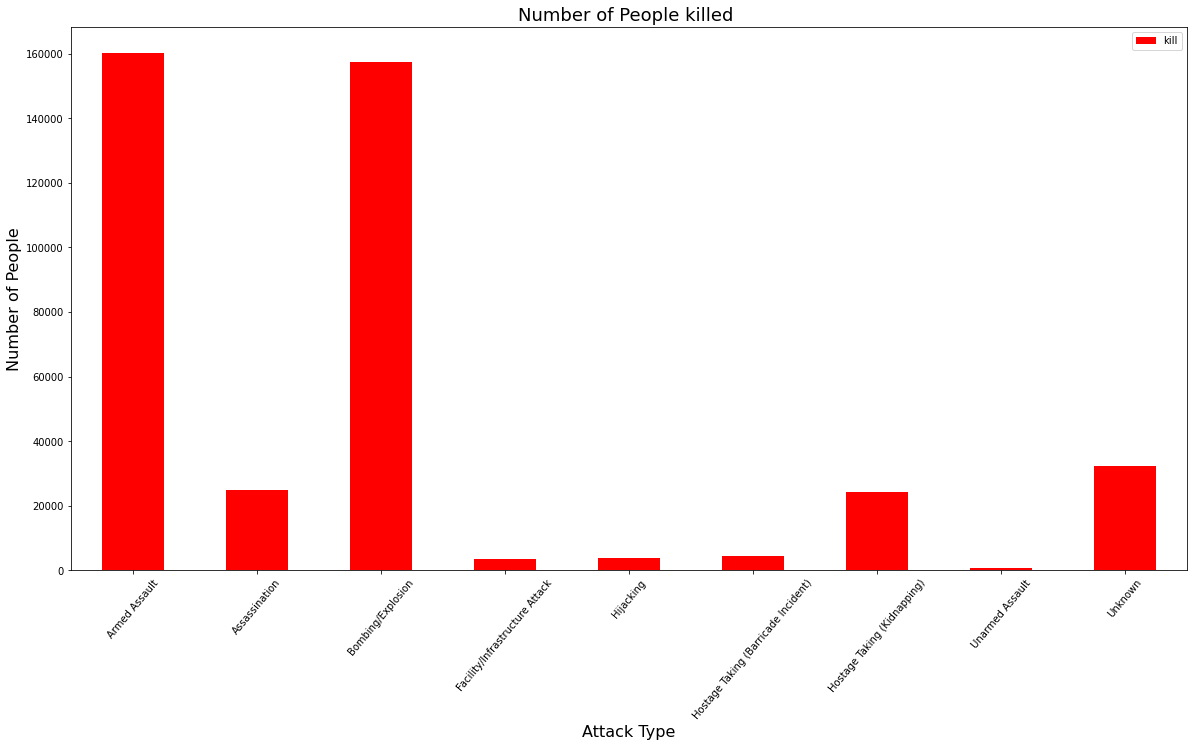

In [25]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color="Red")
plt.xticks(rotation=50)
plt.title("Number of People killed ",fontsize=18)
plt.ylabel('Number of People',fontsize=16)
plt.xlabel('Attack Type',fontsize=16)
plt.show()

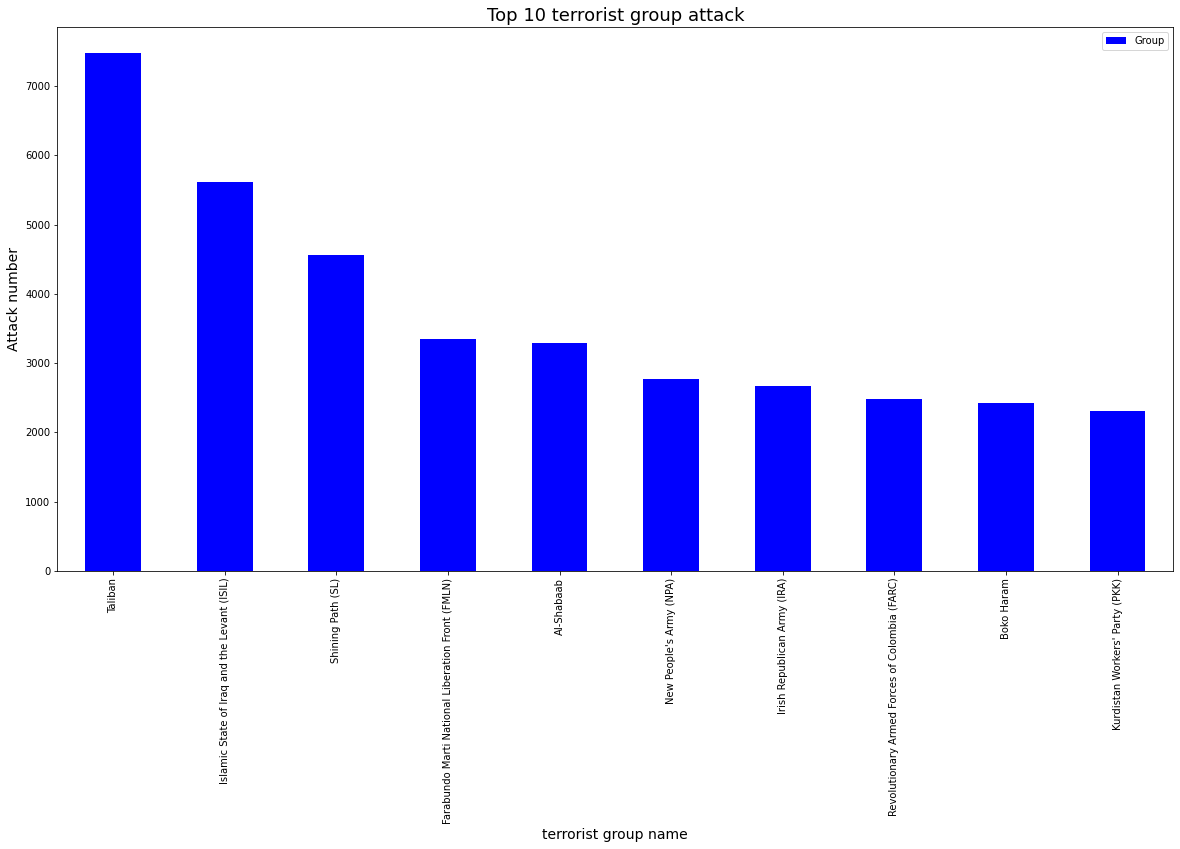

In [26]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='blue',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=18)
plt.xlabel("terrorist group name",fontsize=14)
plt.ylabel("Attack number",fontsize=14)
plt.show()

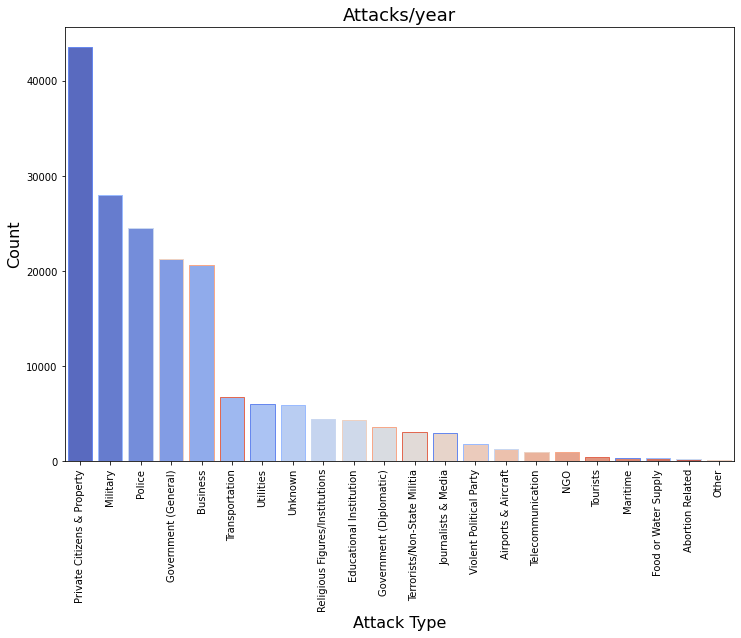

In [27]:
plt.subplots(figsize=(12,8))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="coolwarm",edgecolor=sns.color_palette("coolwarm"));
plt.xticks(rotation=90)
plt.xlabel("Attack Type",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Attacks/year",fontsize=18)
plt.show()

Let us now make a conclusion through all the visualizations and get information about top 10 most attacked countries.

In [29]:
top10 = data[['Group','Country','kill']]
top10 = top10.groupby(['Group','Country'],axis = 0).sum().sort_values('kill',ascending = False).drop('Unknown').reset_index().head(10)
top10

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


## Conclusion:

The country attacked the maximum number of times is Iraq.
The city which is attacked maximum number of times is Baghdad which is in Iraq.
The year in which maximum attacks were made was 2014.
The group with most attacks is Taliban.
The Region in which attacks are at maximum numbers are present in Middle East and North Africa.